# 0.Load Module

In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import decoupler as dc
from gseapy.scipalette import SciPalette
import gseapy as gp
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data_dir = '/home/lzz/rna/output/'
save_dir = '/home/lzz/rna/output/'

# 1.enrichment analysis

In [8]:
diff = pd.read_csv('/home/lzz/rna/output/diff_blm_pbs.csv', index_col=0, header=0)
diff

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001.4,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
ENSMUSG00000000028.15,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
ENSMUSG00000000031.16,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
ENSMUSG00000000037.17,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
ENSMUSG00000000049.11,4.257233,0.470250,1.132811,0.415118,0.678055,NaN
...,...,...,...,...,...,...
ENSMUSG00000118425.1,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN
ENSMUSG00000118449.1,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379
ENSMUSG00000118456.1,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902
ENSMUSG00000118458.1,1.735343,0.319902,1.734829,0.184400,0.853700,NaN


In [9]:
mm10 = pd.read_csv('/mnt/i/Suspended/RNA/mm10.gtf', sep='\t', comment='#', header=None)
print(mm10.shape)
mm10.head()

(1860964, 9)


,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; gene_type ""TEC..."
1,chr1,HAVANA,transcript,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
2,chr1,HAVANA,exon,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
3,chr1,ENSEMBL,gene,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; gene_type ""snR..."
4,chr1,ENSEMBL,transcript,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; transcript_id ..."


In [10]:
mm10_gene = mm10[mm10[2] == 'gene']
mm10_gene

,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; gene_type ""TEC..."
3,chr1,ENSEMBL,gene,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; gene_type ""snR..."
6,chr1,HAVANA,gene,3205901,3671498,.,-,.,"gene_id ""ENSMUSG00000051951.5""; gene_type ""pro..."
24,chr1,HAVANA,gene,3252757,3253236,.,+,.,"gene_id ""ENSMUSG00000102851.1""; gene_type ""pro..."
27,chr1,HAVANA,gene,3365731,3368549,.,-,.,"gene_id ""ENSMUSG00000103377.1""; gene_type ""TEC..."
...,...,...,...,...,...,...,...,...,...
1860943,chrM,ENSEMBL,gene,13552,14070,.,-,.,"gene_id ""ENSMUSG00000064368.1""; gene_type ""pro..."
1860950,chrM,ENSEMBL,gene,14071,14139,.,-,.,"gene_id ""ENSMUSG00000064369.1""; gene_type ""Mt_..."
1860953,chrM,ENSEMBL,gene,14145,15288,.,+,.,"gene_id ""ENSMUSG00000064370.1""; gene_type ""pro..."
1860958,chrM,ENSEMBL,gene,15289,15355,.,+,.,"gene_id ""ENSMUSG00000064371.1""; gene_type ""Mt_..."


In [11]:
mm10_gene_split = pd.DataFrame(mm10_gene[8].str.split('; ').tolist())
mm10_gene_split

,0,1,2,3,4,5,6,7,8
0,"gene_id ""ENSMUSG00000102693.1""","gene_type ""TEC""","gene_name ""4933401J01Rik""",level 2,"mgi_id ""MGI:1918292""","havana_gene ""OTTMUSG00000049935.1"";",None,None,None
1,"gene_id ""ENSMUSG00000064842.1""","gene_type ""snRNA""","gene_name ""Gm26206""",level 3,"mgi_id ""MGI:5455983"";",None,None,None,None
2,"gene_id ""ENSMUSG00000051951.5""","gene_type ""protein_coding""","gene_name ""Xkr4""",level 2,"mgi_id ""MGI:3528744""","havana_gene ""OTTMUSG00000026353.2"";",None,None,None
3,"gene_id ""ENSMUSG00000102851.1""","gene_type ""processed_pseudogene""","gene_name ""Gm18956""",level 1,"mgi_id ""MGI:5011141""","tag ""pseudo_consens""","havana_gene ""OTTMUSG00000049958.1"";",None,None
4,"gene_id ""ENSMUSG00000103377.1""","gene_type ""TEC""","gene_name ""Gm37180""",level 2,"mgi_id ""MGI:5610408""","havana_gene ""OTTMUSG00000049960.1"";",None,None,None
...,...,...,...,...,...,...,...,...,...
55482,"gene_id ""ENSMUSG00000064368.1""","gene_type ""protein_coding""","gene_name ""mt-Nd6""",level 3,"mgi_id ""MGI:102495"";",None,None,None,None
55483,"gene_id ""ENSMUSG00000064369.1""","gene_type ""Mt_tRNA""","gene_name ""mt-Te""",level 3,"mgi_id ""MGI:102488"";",None,None,None,None
55484,"gene_id ""ENSMUSG00000064370.1""","gene_type ""protein_coding""","gene_name ""mt-Cytb""",level 3,"mgi_id ""MGI:102501"";",None,None,None,None
55485,"gene_id ""ENSMUSG00000064371.1""","gene_type ""Mt_tRNA""","gene_name ""mt-Tt""",level 3,"mgi_id ""MGI:102473"";",None,None,None,None


In [12]:
mm10_gene_split[0] = mm10_gene_split[0].str.replace('gene_id "', '')
mm10_gene_split[0] = mm10_gene_split[0].str.replace('"', '')
mm10_gene_split[0]

0        ENSMUSG00000102693.1
1        ENSMUSG00000064842.1
2        ENSMUSG00000051951.5
3        ENSMUSG00000102851.1
4        ENSMUSG00000103377.1
                 ...         
55482    ENSMUSG00000064368.1
55483    ENSMUSG00000064369.1
55484    ENSMUSG00000064370.1
55485    ENSMUSG00000064371.1
55486    ENSMUSG00000064372.1
Name: 0, Length: 55487, dtype: object

In [13]:
mm10_gene_split[2] = mm10_gene_split[2].str.replace('gene_name "', '')
mm10_gene_split[2] = mm10_gene_split[2].str.replace('"', '')
mm10_gene_split[2]

0        4933401J01Rik
1              Gm26206
2                 Xkr4
3              Gm18956
4              Gm37180
             ...      
55482           mt-Nd6
55483            mt-Te
55484          mt-Cytb
55485            mt-Tt
55486            mt-Tp
Name: 2, Length: 55487, dtype: object

In [14]:
mm10_gene_split[2].to_list()

['4933401J01Rik',
 'Gm26206',
 'Xkr4',
 'Gm18956',
 'Gm37180',
 'Gm37363',
 'Gm37686',
 'Gm1992',
 'Gm37329',
 'Gm7341',
 'Gm38148',
 'Gm19938',
 'Gm10568',
 'Gm38385',
 'Gm27396',
 'Gm37381',
 'Rp1',
 'Gm6101',
 'Gm37483',
 'Sox17',
 'Gm37587',
 'Gm7357',
 'Gm22307',
 'Gm38076',
 'Gm37323',
 'Gm7369',
 'Gm6085',
 'Gm6119',
 'Gm25493',
 'Gm2053',
 'Gm6123',
 'Mrpl15',
 'Gm37144',
 'Lypla1',
 'Gm37988',
 'Tcea1',
 'Gm6104',
 'Gm37277',
 'Rgs20',
 'Gm17100',
 'Gm37079',
 'Gm16041',
 'Gm17101',
 'Atp6v1h',
 'Gm7182',
 'Gm37567',
 'Gm38264',
 'Oprk1',
 'Gm36965',
 'Gm22463',
 'Gm37429',
 'Npbwr1',
 'Gm19214',
 'Rb1cc1',
 '4732440D04Rik',
 'Alkal1',
 'Gm2147',
 'Gm7417',
 'Gm19026',
 'St18',
 'Gm42492',
 'Gm7449',
 'Gm37108',
 'Gm37275',
 'Gm37225',
 'Gm37489',
 'Gm5694',
 'Pcmtd1',
 'Gm26983',
 'Gm38372',
 'Gm9826',
 'Nras-ps2',
 'Gm23274',
 'Gm19002',
 'Gm26901',
 'Gm18984',
 'Gm30414',
 'Gm37791',
 'Gm7470',
 'Rps2-ps2',
 'Gm38216',
 'Sntg1',
 'Gm38024',
 'Gm16284',
 'Gm38259',
 'Gm23358

In [15]:
mm10_gene_split

,0,1,2,3,4,5,6,7,8
0,ENSMUSG00000102693.1,"gene_type ""TEC""",4933401J01Rik,level 2,"mgi_id ""MGI:1918292""","havana_gene ""OTTMUSG00000049935.1"";",None,None,None
1,ENSMUSG00000064842.1,"gene_type ""snRNA""",Gm26206,level 3,"mgi_id ""MGI:5455983"";",None,None,None,None
2,ENSMUSG00000051951.5,"gene_type ""protein_coding""",Xkr4,level 2,"mgi_id ""MGI:3528744""","havana_gene ""OTTMUSG00000026353.2"";",None,None,None
3,ENSMUSG00000102851.1,"gene_type ""processed_pseudogene""",Gm18956,level 1,"mgi_id ""MGI:5011141""","tag ""pseudo_consens""","havana_gene ""OTTMUSG00000049958.1"";",None,None
4,ENSMUSG00000103377.1,"gene_type ""TEC""",Gm37180,level 2,"mgi_id ""MGI:5610408""","havana_gene ""OTTMUSG00000049960.1"";",None,None,None
...,...,...,...,...,...,...,...,...,...
55482,ENSMUSG00000064368.1,"gene_type ""protein_coding""",mt-Nd6,level 3,"mgi_id ""MGI:102495"";",None,None,None,None
55483,ENSMUSG00000064369.1,"gene_type ""Mt_tRNA""",mt-Te,level 3,"mgi_id ""MGI:102488"";",None,None,None,None
55484,ENSMUSG00000064370.1,"gene_type ""protein_coding""",mt-Cytb,level 3,"mgi_id ""MGI:102501"";",None,None,None,None
55485,ENSMUSG00000064371.1,"gene_type ""Mt_tRNA""",mt-Tt,level 3,"mgi_id ""MGI:102473"";",None,None,None,None


In [44]:
mm10_gene_split.to_csv('/home/lzz/rna/data/mm10_gene_split.csv', index=False)

## 1.1 up regulation

In [45]:
deg_df = diff.loc[(diff['padj'] < 0.05) & (diff['log2FoldChange'] > 1), :]
deg_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000031.16,41.267060,1.616352,0.516968,3.126598,1.768413e-03,9.922954e-03
ENSMUSG00000000278.10,2536.710915,1.165662,0.119537,9.751466,1.818234e-22,1.579844e-20
ENSMUSG00000000290.13,26078.878441,1.317006,0.165692,7.948495,1.887905e-15,8.850005e-14
ENSMUSG00000000552.10,883.641824,1.034945,0.125419,8.251930,1.558570e-16,8.174888e-15
ENSMUSG00000000555.8,3300.243053,1.128061,0.089231,12.642091,1.237200e-36,2.627752e-34
...,...,...,...,...,...,...
ENSMUSG00000114501.1,44.930973,1.110337,0.320453,3.464892,5.304442e-04,3.543985e-03
ENSMUSG00000114608.1,291.967962,1.861637,0.191362,9.728377,2.282049e-22,1.963018e-20
ENSMUSG00000115230.1,138.109917,1.494075,0.219811,6.797096,1.067493e-11,3.193938e-10
ENSMUSG00000116605.1,21.165579,1.795055,0.474266,3.784913,1.537621e-04,1.190585e-03


In [46]:
gene_sets=[
    'Reactome_2022', 'MSigDB_Hallmark_2020', 'KEGG_2019_Mouse',
    'GO_Biological_Process_2023', 'WikiPathways_2019_Mouse']

In [47]:
pd.Series(deg_df.index.isin(mm10_gene_split[0])).value_counts()

True    573
Name: count, dtype: int64

In [48]:
deg_gene = mm10_gene_split.loc[mm10_gene_split[0].isin(deg_df.index), 2]
deg_gene 

59          St18
256        Pkhd1
264        Il17a
584        Npas2
593      Gm15832
          ...   
52937      Tlr13
53239        Gla
53379     Rnf128
53689     Ptchd1
53699       Phex
Name: 2, Length: 573, dtype: object

In [49]:
enr_up = gp.enrichr(
    gene_list=list(deg_gene),
    gene_sets=gene_sets,
    cutoff = 1,
    organism='mouse',
    outdir=save_dir+'rna_bs_up_regulated')

## 1.2 down regulation

In [50]:
deg_df = diff.loc[(diff['padj'] < 0.05) & (diff['log2FoldChange'] < -1), :]
deg_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000402.2,355.871418,-1.310019,0.232364,-5.637780,1.722569e-08,3.103149e-07
ENSMUSG00000002588.13,112.770680,-1.718994,0.266898,-6.440649,1.189636e-10,3.050148e-09
ENSMUSG00000002769.9,49.387605,-1.953408,0.357538,-5.463495,4.668497e-08,7.675804e-07
ENSMUSG00000003477.5,16566.454505,-1.529334,0.165078,-9.264288,1.963836e-20,1.425563e-18
ENSMUSG00000003585.13,568.445094,-1.029406,0.117078,-8.792498,1.462711e-18,9.084651e-17
...,...,...,...,...,...,...
ENSMUSG00000110380.1,13.169702,-1.624595,0.602193,-2.697798,6.979969e-03,3.137794e-02
ENSMUSG00000113303.1,18.388533,-1.641999,0.511489,-3.210233,1.326276e-03,7.766256e-03
ENSMUSG00000114858.1,24.611843,-1.101609,0.423053,-2.603953,9.215546e-03,3.961626e-02
ENSMUSG00000115946.2,37.246413,-1.056065,0.402101,-2.626366,8.630187e-03,3.760733e-02


In [51]:
gene_sets=[
    'Reactome_2022', 'MSigDB_Hallmark_2020', 'KEGG_2019_Mouse',
    'GO_Biological_Process_2023', 'WikiPathways_2019_Mouse']

In [52]:
pd.Series(deg_df.index.isin(mm10_gene_split[0])).value_counts()

True    353
Name: count, dtype: int64

In [53]:
deg_gene = mm10_gene_split.loc[mm10_gene_split[0].isin(deg_df.index), 2]
deg_gene 

280              Gsta3
283             Gm4956
297            Gm26580
522            Fam178b
549      2010300C02Rik
             ...      
53447           Chrdl1
53492            Htr2c
53789            S100g
53806             Ace2
53834            Egfl6
Name: 2, Length: 353, dtype: object

In [54]:
enr_up = gp.enrichr(
    gene_list=list(deg_gene),
    gene_sets=gene_sets,
    cutoff = 1,
    organism='mouse',
    outdir=save_dir+'rna_bs_dw_regulated')

# 2.Pathway plot

## 2.1 up regulation

In [55]:
pathwaydir = '/home/lzz/rna/output/rna_bs_up_regulated/'
dirlist = glob.glob(
    pathname=pathwaydir+'*reports.txt',
    recursive=True)
dirlist

['/home/lzz/rna/output/rna_bs_up_regulated/KEGG_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/rna/output/rna_bs_up_regulated/MSigDB_Hallmark_2020.mouse.enrichr.reports.txt',
 '/home/lzz/rna/output/rna_bs_up_regulated/WikiPathways_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/rna/output/rna_bs_up_regulated/Reactome_2022.mouse.enrichr.reports.txt',
 '/home/lzz/rna/output/rna_bs_up_regulated/GO_Biological_Process_2023.mouse.enrichr.reports.txt']

In [56]:
filelist = []
for i in dirlist:
    tmp = pd.read_table(i)
    print(tmp.shape)
    filelist.append(tmp)

(243, 10)
(41, 10)
(97, 10)
(640, 10)
(2432, 10)


In [57]:
pathway_all = pd.concat(filelist, ignore_index=True)
pathway_sig = pathway_all.loc[pathway_all['Adjusted P-value'] < 0.05, :]
pathway_sig['Gene_set'].value_counts()
pathway_sig = pathway_sig.sort_values('Adjusted P-value')
pathway_sig = pathway_sig.reset_index(drop=True)
pathway_sig.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,33/200,3.439118e-16,1.410039e-14,0,0,7.047904,250.94870,FBN2;ECM1;ITGB5;LAMA1;ELN;TNC;CAPG;CXCL1;ENO2;...
1,KEGG_2019_Mouse,Lysosome,26/124,1.264552e-15,3.072862e-13,0,0,9.374958,321.59910,CD63;HEXB;CTSZ;HEXA;TCIRG1;LIPA;CTSS;NAGLU;GM2...
2,Reactome_2022,Neutrophil Degranulation R-HSA-6798695,50/468,1.028173e-15,6.580308e-13,0,0,4.347617,150.04060,ORM1;HEXB;ITGB2;CTSZ;CXCL1;TCIRG1;CTSS;PYCARD;...
3,Reactome_2022,Extracellular Matrix Organization R-HSA-1474244,34/291,3.769580e-12,1.206266e-09,0,0,4.705211,123.76620,FBN2;COL15A1;ITGB5;LAMA1;ITGB2;ITGAE;CTSS;LOXL...
4,Reactome_2022,Innate Immune System R-HSA-168249,71/1035,7.094021e-12,1.513391e-09,0,0,2.708818,69.54016,ORM1;NCF1;HEXB;ITGB2;CTSZ;TREM2;CXCL1;TCIRG1;C...


In [58]:
pathway_sig['Term_sim'] = pathway_sig['Term'].str.split(' \\(GO|WP| R-HSA').str[0]
pathway_sig['-log10(Adjusted P-value)'] = -np.log10(pathway_sig['Adjusted P-value'])
pathway_sig.to_csv(pathwaydir+'combind_sig.csv')

In [59]:
pathway_sig = pd.read_csv(pathwaydir+'combind_sig.csv', index_col=0)
pathway_sig

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)
0,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,33/200,3.439118e-16,1.410039e-14,0,0,7.047904,250.948700,FBN2;ECM1;ITGB5;LAMA1;ELN;TNC;CAPG;CXCL1;ENO2;...,Epithelial Mesenchymal Transition,13.850769
1,KEGG_2019_Mouse,Lysosome,26/124,1.264552e-15,3.072862e-13,0,0,9.374958,321.599100,CD63;HEXB;CTSZ;HEXA;TCIRG1;LIPA;CTSS;NAGLU;GM2...,Lysosome,12.512457
2,Reactome_2022,Neutrophil Degranulation R-HSA-6798695,50/468,1.028173e-15,6.580308e-13,0,0,4.347617,150.040600,ORM1;HEXB;ITGB2;CTSZ;CXCL1;TCIRG1;CTSS;PYCARD;...,Neutrophil Degranulation,12.181754
3,Reactome_2022,Extracellular Matrix Organization R-HSA-1474244,34/291,3.769580e-12,1.206266e-09,0,0,4.705211,123.766200,FBN2;COL15A1;ITGB5;LAMA1;ITGB2;ITGAE;CTSS;LOXL...,Extracellular Matrix Organization,8.918557
4,Reactome_2022,Innate Immune System R-HSA-168249,71/1035,7.094021e-12,1.513391e-09,0,0,2.708818,69.540160,ORM1;NCF1;HEXB;ITGB2;CTSZ;TREM2;CXCL1;TCIRG1;C...,Innate Immune System,8.820049
...,...,...,...,...,...,...,...,...,...,...,...,...
174,GO_Biological_Process_2023,Regulation Of Interleukin-10 Production (GO:00...,6/46,1.905738e-03,4.588866e-02,0,0,5.128836,32.121310,PYCARD;TYROBP;CLEC7A;FCGR2B;FOXP3;VSIR,Regulation Of Interleukin-10 Production,1.338295
175,GO_Biological_Process_2023,Positive Regulation Of Endocytosis (GO:0045807),8/79,1.891920e-03,4.588866e-02,0,0,3.860102,24.203470,PYCARD;AHSG;CLEC7A;SLC11A1;TREM2;CYBA;APOE;FCGR2B,Positive Regulation Of Endocytosis,1.338295
176,GO_Biological_Process_2023,Regulation Of Fibroblast Proliferation (GO:004...,6/46,1.905738e-03,4.588866e-02,0,0,5.128836,32.121310,SFRP1;CD300A;PDGFC;FN1;IGF1;EREG,Regulation Of Fibroblast Proliferation,1.338295
177,GO_Biological_Process_2023,Intracellular pH Reduction (GO:0051452),5/32,2.012937e-03,4.799474e-02,0,0,6.324987,39.266530,SLC11A1;SLAMF8;TCIRG1;ATP6V0C;TPCN2,Intracellular pH Reduction,1.318806


In [60]:
pathway_sig_plot = pathway_sig.iloc[0:9, :]
pathway_sig_plot

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)
0,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,33/200,3.439118e-16,1.410039e-14,0,0,7.047904,250.94870,FBN2;ECM1;ITGB5;LAMA1;ELN;TNC;CAPG;CXCL1;ENO2;...,Epithelial Mesenchymal Transition,13.850769
1,KEGG_2019_Mouse,Lysosome,26/124,1.264552e-15,3.072862e-13,0,0,9.374958,321.59910,CD63;HEXB;CTSZ;HEXA;TCIRG1;LIPA;CTSS;NAGLU;GM2...,Lysosome,12.512457
2,Reactome_2022,Neutrophil Degranulation R-HSA-6798695,50/468,1.028173e-15,6.580308e-13,0,0,4.347617,150.04060,ORM1;HEXB;ITGB2;CTSZ;CXCL1;TCIRG1;CTSS;PYCARD;...,Neutrophil Degranulation,12.181754
3,Reactome_2022,Extracellular Matrix Organization R-HSA-1474244,34/291,3.769580e-12,1.206266e-09,0,0,4.705211,123.76620,FBN2;COL15A1;ITGB5;LAMA1;ITGB2;ITGAE;CTSS;LOXL...,Extracellular Matrix Organization,8.918557
4,Reactome_2022,Innate Immune System R-HSA-168249,71/1035,7.094021e-12,1.513391e-09,0,0,2.708818,69.54016,ORM1;NCF1;HEXB;ITGB2;CTSZ;TREM2;CXCL1;TCIRG1;C...,Innate Immune System,8.820049
5,GO_Biological_Process_2023,Extracellular Matrix Organization (GO:0030198),27/176,1.067254e-12,2.595562e-09,0,0,6.398038,176.36790,COL15A1;ELN;DMP1;CAPG;ADAMTS12;LOXL1;CTSS;IBSP...,Extracellular Matrix Organization,8.585769
6,Reactome_2022,Immune System R-HSA-168256,104/1943,2.317655e-10,3.708248e-08,0,0,2.120778,47.05009,CD86;IL1RN;NCF1;PYCARD;LGALS3;KIF5C;PLAU;ANPEP...,Immune System,7.430831
7,WikiPathways_2019_Mouse,TYROBP Causal Network WP3625,14/58,6.818175e-10,6.613630e-08,0,0,11.032770,232.86050,CD84;ITGB2;CAPG;TCIRG1;LHFPL2;TNFRSF1B;CXCL16;...,TYROBP Causal Network,7.179560
8,GO_Biological_Process_2023,Extracellular Structure Organization (GO:0043062),19/109,2.620072e-10,2.500034e-07,0,0,7.368692,162.57290,COL28A1;COL15A1;COL24A1;MMP2;DMP1;ADAMTS12;COL...,Extracellular Structure Organization,6.602054


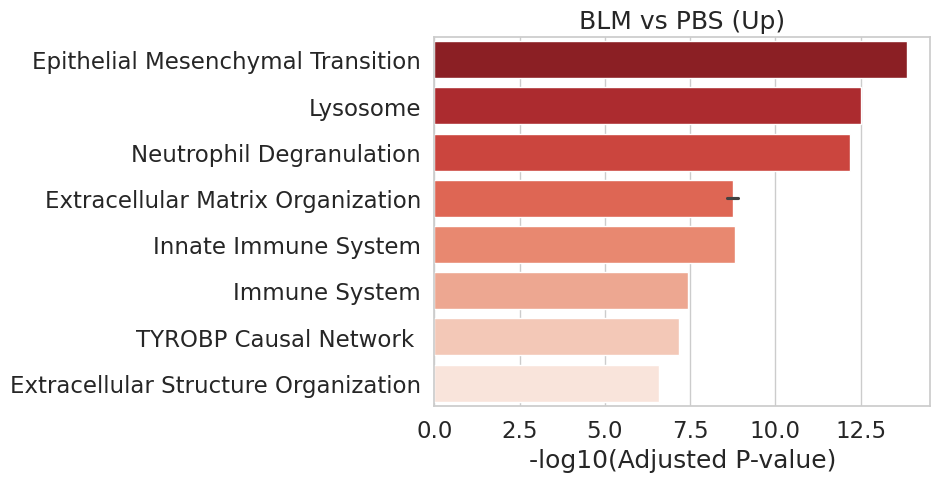

In [62]:
sns.barplot(pathway_sig_plot,
            x="-log10(Adjusted P-value)",
            y="Term_sim", palette="Reds_r")
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.ylabel('')
plt.title('BLM vs PBS (Up)')
plt.savefig(pathwaydir+'combind_sig.pdf', bbox_inches='tight')

## 2.2 down regulation

In [63]:
pathwaydir = '/home/lzz/rna/output/rna_bs_dw_regulated/'
dirlist = glob.glob(
    pathname=pathwaydir+'*reports.txt',
    recursive=True)
dirlist

['/home/lzz/rna/output/rna_bs_dw_regulated/KEGG_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/rna/output/rna_bs_dw_regulated/MSigDB_Hallmark_2020.mouse.enrichr.reports.txt',
 '/home/lzz/rna/output/rna_bs_dw_regulated/WikiPathways_2019_Mouse.mouse.enrichr.reports.txt',
 '/home/lzz/rna/output/rna_bs_dw_regulated/Reactome_2022.mouse.enrichr.reports.txt',
 '/home/lzz/rna/output/rna_bs_dw_regulated/GO_Biological_Process_2023.mouse.enrichr.reports.txt']

In [64]:
filelist = []
for i in dirlist:
    tmp = pd.read_table(i)
    print(tmp.shape)
    filelist.append(tmp)

(189, 10)
(34, 10)
(93, 10)
(483, 10)
(1353, 10)


In [65]:
pathway_all = pd.concat(filelist, ignore_index=True)
pathway_sig = pathway_all.loc[pathway_all['Adjusted P-value'] < 0.05, :]
pathway_sig['Gene_set'].value_counts()
pathway_sig = pathway_sig.sort_values('Adjusted P-value')
pathway_sig = pathway_sig.reset_index(drop=True)
pathway_sig.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Mouse,Salivary secretion,12/78,1.158289e-08,0.000002,0,0,10.440420,190.78540,GUCY1A2;GUCY1A1;GUCY1B1;ADRB3;TRPV6;LYZ1;PRKG2...
1,Reactome_2022,Diseases Associated With Surfactant Metabolism...,5/9,1.979432e-07,0.000096,0,0,70.556750,1089.06400,SFTPB;SLC34A2;SFTPC;SFTPD;SFTPA1
2,KEGG_2019_Mouse,cGMP-PKG signaling pathway,14/172,2.353852e-06,0.000222,0,0,5.094022,66.01576,GUCY1A2;GUCY1A1;GUCY1B1;IRS1;ADRA1D;ATP1A2;ATP...
3,Reactome_2022,Defective CSF2RA Causes SMDP4 R-HSA-5688890,4/7,3.202045e-06,0.000773,0,0,75.048710,949.49530,SFTPB;SFTPC;SFTPD;SFTPA1
4,Reactome_2022,Adrenoceptors R-HSA-390696,4/9,1.120847e-05,0.001805,0,0,45.024640,513.22870,ADRB3;ADRA1D;ADRA1B;ADRA1A


In [66]:
pathway_sig['Term_sim'] = pathway_sig['Term'].str.split(' \\(GO|WP| R-HSA').str[0]
pathway_sig['-log10(Adjusted P-value)'] = -np.log10(pathway_sig['Adjusted P-value'])
pathway_sig.to_csv(pathwaydir+'combind_sig.csv')

In [67]:
pathway_sig = pd.read_csv(pathwaydir+'combind_sig.csv', index_col=0)

In [68]:
pathway_sig_plot = pathway_sig.iloc[0:9, :]
pathway_sig_plot

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Term_sim,-log10(Adjusted P-value)
0,KEGG_2019_Mouse,Salivary secretion,12/78,1.158289e-08,0.000002,0,0,10.440420,190.78540,GUCY1A2;GUCY1A1;GUCY1B1;ADRB3;TRPV6;LYZ1;PRKG2...,Salivary secretion,5.659721
1,Reactome_2022,Diseases Associated With Surfactant Metabolism...,5/9,1.979432e-07,0.000096,0,0,70.556750,1089.06400,SFTPB;SLC34A2;SFTPC;SFTPD;SFTPA1,Diseases Associated With Surfactant Metabolism,4.019512
2,KEGG_2019_Mouse,cGMP-PKG signaling pathway,14/172,2.353852e-06,0.000222,0,0,5.094022,66.01576,GUCY1A2;GUCY1A1;GUCY1B1;IRS1;ADRA1D;ATP1A2;ATP...,cGMP-PKG signaling pathway,3.652789
3,Reactome_2022,Defective CSF2RA Causes SMDP4 R-HSA-5688890,4/7,3.202045e-06,0.000773,0,0,75.048710,949.49530,SFTPB;SFTPC;SFTPD;SFTPA1,Defective CSF2RA Causes SMDP4,3.111655
4,Reactome_2022,Adrenoceptors R-HSA-390696,4/9,1.120847e-05,0.001805,0,0,45.024640,513.22870,ADRB3;ADRA1D;ADRA1B;ADRA1A,Adrenoceptors,2.743628
5,KEGG_2019_Mouse,Mineral absorption,6/44,1.161261e-04,0.006587,0,0,8.922645,80.84661,S100G;SLC34A2;TRPV6;ATP1A2;SLC26A9;ATP1B1,Mineral absorption,2.181297
6,KEGG_2019_Mouse,Gap junction,8/86,1.394124e-04,0.006587,0,0,5.817614,51.64921,GUCY1A2;GUCY1A1;GUCY1B1;TUBB1;HTR2C;PRKG2;TUBB...,Gap junction,2.181297
7,MSigDB_Hallmark_2020,KRAS Signaling Dn,12/200,2.387106e-04,0.008116,0,0,3.642416,30.37869,CNTFR;TG;KCNE2;ACTC1;KRT4;GDNF;ZBTB16;TFCP2L1;...,KRAS Signaling Dn,2.090649
8,Reactome_2022,Surfactant Metabolism R-HSA-5683826,5/29,1.395160e-04,0.016847,0,0,11.747490,104.28630,SFTPB;SLC34A2;SFTPC;SFTPD;SFTPA1,Surfactant Metabolism,1.773489


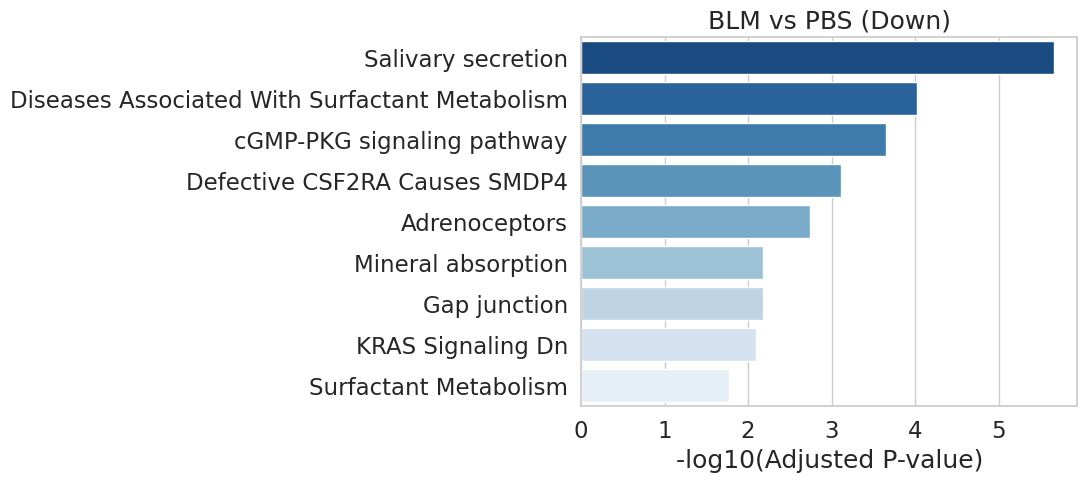

In [69]:
sns.barplot(pathway_sig_plot,
            x="-log10(Adjusted P-value)",
            y="Term_sim", palette="Blues_r")
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.ylabel('')
plt.title('BLM vs PBS (Down)')
plt.savefig(pathwaydir+'combind_sig.pdf', bbox_inches='tight')

# 3.DecoupleR

## 3.1 base bulk count

In [103]:
import scanpy as sc
adata = sc.read_h5ad('/home/lzz/rna/data/dds.h5ad')
adata

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [104]:
print(adata.X)

[[4786  152   78 ...   98    2   36]
 [4377  150   78 ...   94    1   17]
 [3900  138   40 ...  105    3   21]
 [3830  113   10 ...  137    0   43]
 [3583  126    8 ...  111    0   26]
 [4211  132   45 ...  160    5   38]]


In [105]:
adata.X = adata.layers['normed_counts']

In [106]:
print(adata.X)

[[4.25084685e+03 1.35003912e+02 6.92783231e+01 ... 8.70419957e+01
  1.77636726e+00 3.19746107e+01]
 [4.28902784e+03 1.46985190e+02 7.64322987e+01 ... 9.21107189e+01
  9.79901265e-01 1.66583215e+01]
 [4.05963600e+03 1.43648659e+02 4.16372924e+01 ... 1.09297892e+02
  3.12279693e+00 2.18595785e+01]
 [3.78276570e+03 1.11606403e+02 9.87667286e+00 ... 1.35310418e+02
  0.00000000e+00 4.24696933e+01]
 [4.29101620e+03 1.50898142e+02 9.58083438e+00 ... 1.32934077e+02
  0.00000000e+00 3.11377117e+01]
 [3.81768690e+03 1.19671021e+02 4.07969391e+01 ... 1.45055783e+02
  4.53299323e+00 3.44507486e+01]]


In [3]:
mm10_gene_split = pd.read_csv('/home/lzz/rna/data/mm10_gene_split.csv')
mm10_gene_split = mm10_gene_split.iloc[:, 0:3]
mm10_gene_split

,0,1,2
0,ENSMUSG00000102693.1,"gene_type ""TEC""",4933401J01Rik
1,ENSMUSG00000064842.1,"gene_type ""snRNA""",Gm26206
2,ENSMUSG00000051951.5,"gene_type ""protein_coding""",Xkr4
3,ENSMUSG00000102851.1,"gene_type ""processed_pseudogene""",Gm18956
4,ENSMUSG00000103377.1,"gene_type ""TEC""",Gm37180
...,...,...,...
55482,ENSMUSG00000064368.1,"gene_type ""protein_coding""",mt-Nd6
55483,ENSMUSG00000064369.1,"gene_type ""Mt_tRNA""",mt-Te
55484,ENSMUSG00000064370.1,"gene_type ""protein_coding""",mt-Cytb
55485,ENSMUSG00000064371.1,"gene_type ""Mt_tRNA""",mt-Tt


In [4]:
mm10_gene_split.rename(columns={'0': 'gene_id', '1': 'gene_type', '2': 'gene_name'}, inplace=True)
mm10_gene_split

,gene_id,gene_type,gene_name
0,ENSMUSG00000102693.1,"gene_type ""TEC""",4933401J01Rik
1,ENSMUSG00000064842.1,"gene_type ""snRNA""",Gm26206
2,ENSMUSG00000051951.5,"gene_type ""protein_coding""",Xkr4
3,ENSMUSG00000102851.1,"gene_type ""processed_pseudogene""",Gm18956
4,ENSMUSG00000103377.1,"gene_type ""TEC""",Gm37180
...,...,...,...
55482,ENSMUSG00000064368.1,"gene_type ""protein_coding""",mt-Nd6
55483,ENSMUSG00000064369.1,"gene_type ""Mt_tRNA""",mt-Te
55484,ENSMUSG00000064370.1,"gene_type ""protein_coding""",mt-Cytb
55485,ENSMUSG00000064371.1,"gene_type ""Mt_tRNA""",mt-Tt


### 3.1.1 pathway

In [5]:
progeny = dc.get_progeny(organism='mouse', top=500)
progeny

,source,target,weight,p_value
0,Androgen,Tmprss2,11.490631,0.000000e+00
1,Androgen,Nkx3-1,10.622551,2.242078e-44
2,Androgen,Mboat2,10.472733,4.624285e-44
3,Androgen,Klk1b21,10.176186,1.944414e-40
4,Androgen,Klk1b9,10.176186,1.944414e-40
...,...,...,...,...
5426,p53,Zmym4,-2.325752,1.522388e-06
5427,p53,Cfdp1,-1.628168,1.526045e-06
5428,p53,Vps37d,2.309503,1.537098e-06
5429,p53,Tedc1,-2.274823,1.547037e-06


In [89]:
progeny['target'].isin(mm10_gene_split['gene_name']).value_counts()

target
True     5194
False     237
Name: count, dtype: int64

In [90]:
pathway_info = pd.merge(progeny, mm10_gene_split, left_on='target', right_on='gene_name', how='inner')
pathway_info

,source,target,weight,p_value,gene_id,gene_type,gene_name
0,Androgen,Tmprss2,11.490631,0.000000e+00,ENSMUSG00000000385.8,"gene_type ""protein_coding""",Tmprss2
1,Androgen,Nkx3-1,10.622551,2.242078e-44,ENSMUSG00000022061.8,"gene_type ""protein_coding""",Nkx3-1
2,Androgen,Mboat2,10.472733,4.624285e-44,ENSMUSG00000020646.17,"gene_type ""protein_coding""",Mboat2
3,Androgen,Klk1b16,10.176186,1.944414e-40,ENSMUSG00000038968.3,"gene_type ""protein_coding""",Klk1b16
4,Androgen,Klk1b4,10.176186,1.944414e-40,ENSMUSG00000066513.4,"gene_type ""protein_coding""",Klk1b4
...,...,...,...,...,...,...,...
5193,p53,Zmym4,-2.325752,1.522388e-06,ENSMUSG00000042446.16,"gene_type ""protein_coding""",Zmym4
5194,p53,Cfdp1,-1.628168,1.526045e-06,ENSMUSG00000031954.6,"gene_type ""protein_coding""",Cfdp1
5195,p53,Vps37d,2.309503,1.537098e-06,ENSMUSG00000043614.13,"gene_type ""protein_coding""",Vps37d
5196,p53,Tedc1,-2.274823,1.547037e-06,ENSMUSG00000037466.13,"gene_type ""protein_coding""",Tedc1


In [91]:
pathway_info.columns = ['source', 'target1', 'weight', 'p_value', 'target', 'type', 'target2']
pathway_info

,source,target1,weight,p_value,target,type,target2
0,Androgen,Tmprss2,11.490631,0.000000e+00,ENSMUSG00000000385.8,"gene_type ""protein_coding""",Tmprss2
1,Androgen,Nkx3-1,10.622551,2.242078e-44,ENSMUSG00000022061.8,"gene_type ""protein_coding""",Nkx3-1
2,Androgen,Mboat2,10.472733,4.624285e-44,ENSMUSG00000020646.17,"gene_type ""protein_coding""",Mboat2
3,Androgen,Klk1b16,10.176186,1.944414e-40,ENSMUSG00000038968.3,"gene_type ""protein_coding""",Klk1b16
4,Androgen,Klk1b4,10.176186,1.944414e-40,ENSMUSG00000066513.4,"gene_type ""protein_coding""",Klk1b4
...,...,...,...,...,...,...,...
5193,p53,Zmym4,-2.325752,1.522388e-06,ENSMUSG00000042446.16,"gene_type ""protein_coding""",Zmym4
5194,p53,Cfdp1,-1.628168,1.526045e-06,ENSMUSG00000031954.6,"gene_type ""protein_coding""",Cfdp1
5195,p53,Vps37d,2.309503,1.537098e-06,ENSMUSG00000043614.13,"gene_type ""protein_coding""",Vps37d
5196,p53,Tedc1,-2.274823,1.547037e-06,ENSMUSG00000037466.13,"gene_type ""protein_coding""",Tedc1


In [92]:
dc.run_mlm(
    mat=adata,
    net=pathway_info,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

Running mlm on mat with 6 samples and 21344 targets for 14 sources.


In [93]:
adata

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors', 'mlm_estimate', 'mlm_pvals'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [94]:
adata.obsm['mlm_estimate']

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
BLM1,1.376764,3.279874,-0.908934,1.884220,1.350045,-3.924102,0.453686,-0.819028,4.420263,1.682413,-2.462452,1.022236,-0.051149,1.358056
BLM2,1.121788,3.205251,-0.686645,1.739156,1.158262,-4.731672,0.117660,-0.829695,3.543954,1.632453,-1.896865,0.847531,0.222361,1.046924
BLM3,1.452594,3.354147,-0.864164,1.885345,1.458037,-4.219290,0.361073,-0.843328,4.620451,1.617303,-2.476655,1.197623,-0.136735,1.464118
PBS1,2.198921,3.279404,-2.087204,2.447074,1.197733,-1.348386,1.620579,-0.513843,5.354998,0.706286,-3.840101,1.945570,-1.087291,2.176479
PBS2,2.320236,3.696605,-1.919159,2.537730,1.943578,-2.154586,1.215337,-0.525399,4.898155,1.160822,-3.592120,1.867212,-0.773771,2.168028
PBS3,2.244026,3.366757,-1.867883,2.307828,1.083117,-1.619656,1.638300,-0.696661,5.119035,0.718062,-3.535280,1.796259,-1.174563,2.130054


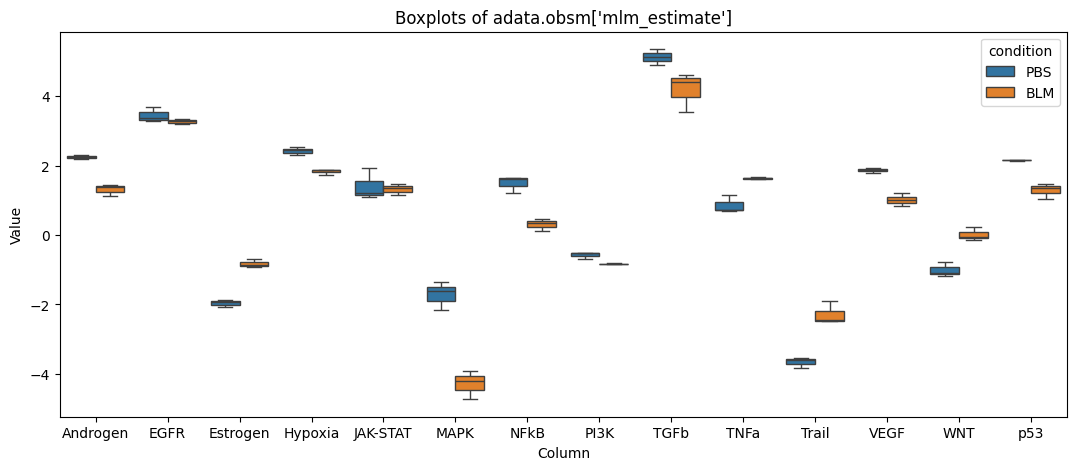

In [95]:
import seaborn as sns

# Convert adata.obsm['mlm_estimate'] to a DataFrame
mlm_estimate_df = pd.DataFrame(adata.obsm['mlm_estimate'], columns=adata.obsm['mlm_estimate'].columns)

# Add 'condition' column from adata.obs to mlm_estimate_df
mlm_estimate_df['condition'] = adata.obs['condition']
mlm_estimate_df['condition'] = mlm_estimate_df['condition'].cat.reorder_categories(['PBS', 'BLM'])
# Melt the DataFrame to long format
mlm_estimate_melted = pd.melt(mlm_estimate_df, id_vars='condition', var_name='column', value_name='value')

# Plot boxplots
plt.figure(figsize=(13, 5))
sns.boxplot(data=mlm_estimate_melted, x='column', y='value', hue='condition')
plt.xticks(rotation=0)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Boxplots of adata.obsm[\'mlm_estimate\']')
plt.show()





### 3.1.2 collectri

In [114]:
# Retrieve CollecTRI gene regulatory network
collectri = dc.get_collectri(organism='mouse', split_complexes=False)
collectri

,source,target,weight,PMID
0,Myc,Tert,1,10022128;10491298;10606235;10637317;10723141;1...
1,Spi1,Bglap,1,10022617
2,Spi1,Bglap3,1,10022617
3,Spi1,Bglap2,1,10022617
4,Smad3,Jun,1,10022869;12374795
...,...,...,...,...
38660,Runx1,Lcp2,1,20019798
38661,Runx1,Prr5l,1,20019798
38662,Twist1,Gli1,1,11948912
38663,Usf1,Nup188,1,22951020


In [115]:
collectri = pd.merge(collectri, mm10_gene_split, left_on='target', right_on='gene_name', how='inner')
collectri

,source,target,weight,PMID,gene_id,gene_type,gene_name
0,Myc,Tert,1,10022128;10491298;10606235;10637317;10723141;1...,ENSMUSG00000021611.9,"gene_type ""protein_coding""",Tert
1,Spi1,Bglap,1,10022617,ENSMUSG00000074483.2,"gene_type ""protein_coding""",Bglap
2,Spi1,Bglap3,1,10022617,ENSMUSG00000074489.9,"gene_type ""protein_coding""",Bglap3
3,Spi1,Bglap2,1,10022617,ENSMUSG00000074486.2,"gene_type ""protein_coding""",Bglap2
4,Smad3,Jun,1,10022869;12374795,ENSMUSG00000052684.4,"gene_type ""protein_coding""",Jun
...,...,...,...,...,...,...,...
37751,Runx1,Lcp2,1,20019798,ENSMUSG00000002699.13,"gene_type ""protein_coding""",Lcp2
37752,Runx1,Prr5l,1,20019798,ENSMUSG00000032841.15,"gene_type ""protein_coding""",Prr5l
37753,Twist1,Gli1,1,11948912,ENSMUSG00000025407.7,"gene_type ""protein_coding""",Gli1
37754,Usf1,Nup188,1,22951020,ENSMUSG00000052533.14,"gene_type ""protein_coding""",Nup188


In [116]:
collectri.columns = ['source', 'target1', 'weight', 'PMID', 'target', 'type', 'target2']
collectri

,source,target1,weight,PMID,target,type,target2
0,Myc,Tert,1,10022128;10491298;10606235;10637317;10723141;1...,ENSMUSG00000021611.9,"gene_type ""protein_coding""",Tert
1,Spi1,Bglap,1,10022617,ENSMUSG00000074483.2,"gene_type ""protein_coding""",Bglap
2,Spi1,Bglap3,1,10022617,ENSMUSG00000074489.9,"gene_type ""protein_coding""",Bglap3
3,Spi1,Bglap2,1,10022617,ENSMUSG00000074486.2,"gene_type ""protein_coding""",Bglap2
4,Smad3,Jun,1,10022869;12374795,ENSMUSG00000052684.4,"gene_type ""protein_coding""",Jun
...,...,...,...,...,...,...,...
37751,Runx1,Lcp2,1,20019798,ENSMUSG00000002699.13,"gene_type ""protein_coding""",Lcp2
37752,Runx1,Prr5l,1,20019798,ENSMUSG00000032841.15,"gene_type ""protein_coding""",Prr5l
37753,Twist1,Gli1,1,11948912,ENSMUSG00000025407.7,"gene_type ""protein_coding""",Gli1
37754,Usf1,Nup188,1,22951020,ENSMUSG00000052533.14,"gene_type ""protein_coding""",Nup188


In [117]:
# # Infer TF activities with ulm
# tf_acts, tf_pvals = dc.run_ulm(mat=adata, net=collectri, verbose=True)
# tf_acts
dc.run_mlm(
    mat=adata,
    net=collectri,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

Running mlm on mat with 6 samples and 21344 targets for 654 sources.


In [118]:
adata

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors', 'mlm_estimate', 'mlm_pvals'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [119]:
adata.obsm['mlm_estimate']

,Abl1,Aebp1,Ahr,Ahrr,Aip,Aire,Apex1,Ar,Arid1a,Arid3a,...,Znf143,Znf148,Znf24,Znf263,Znf335,Znf354c,Znf382,Znf436,Znf76,Zxdc
BLM1,0.919990,7.107955,0.295820,0.235952,-0.088921,-1.125791,-0.939145,2.204689,-0.094608,-0.579581,...,0.981162,-0.434855,0.460775,-0.705131,-0.226456,-2.631029,-0.097412,0.285781,0.000478,-4.737433
BLM2,0.190451,6.235756,1.038698,-0.086508,-0.751416,-0.776406,-0.878315,2.021160,0.412525,-0.513999,...,1.178270,-0.507501,0.329879,-0.478786,-0.066136,-2.867750,0.499701,0.266502,-0.092325,-4.407907
BLM3,1.111520,6.632504,1.118124,0.425090,-0.185616,-0.846876,-1.076311,2.306883,0.405463,-0.626189,...,0.858014,-0.490255,0.381847,-0.778134,-0.169118,-3.037060,-0.308612,0.370679,-0.113037,-4.604442
PBS1,3.436069,0.978488,1.509884,2.765414,2.028260,-1.110326,-1.188657,3.344011,-1.665356,-0.396382,...,0.041057,-0.351985,1.311158,-0.939665,-0.150858,-2.325471,-3.494014,1.438117,0.489679,-3.029276
PBS2,3.447621,0.587749,1.377286,2.500467,2.011215,-1.292775,-0.790544,3.279125,-1.157138,-0.376113,...,0.140353,-0.570788,1.508793,-0.888365,-0.332416,-1.877288,-2.748342,0.951805,0.681316,-3.122559
PBS3,3.343438,0.863470,1.372400,2.910002,1.893526,-1.033874,-0.954083,3.318713,-2.027332,-0.264203,...,-0.152754,-0.244840,1.298234,-0.806196,-0.098629,-2.427204,-3.099048,1.544622,0.694703,-2.457255


In [122]:
mlm_estimate_df

,Abl1,Aebp1,Ahr,Ahrr,Aip,Aire,Apex1,Ar,Arid1a,Arid3a,...,Znf148,Znf24,Znf263,Znf335,Znf354c,Znf382,Znf436,Znf76,Zxdc,condition
BLM1,0.919990,7.107955,0.295820,0.235952,-0.088921,-1.125791,-0.939145,2.204689,-0.094608,-0.579581,...,-0.434855,0.460775,-0.705131,-0.226456,-2.631029,-0.097412,0.285781,0.000478,-4.737433,BLM
BLM2,0.190451,6.235756,1.038698,-0.086508,-0.751416,-0.776406,-0.878315,2.021160,0.412525,-0.513999,...,-0.507501,0.329879,-0.478786,-0.066136,-2.867750,0.499701,0.266502,-0.092325,-4.407907,BLM
BLM3,1.111520,6.632504,1.118124,0.425090,-0.185616,-0.846876,-1.076311,2.306883,0.405463,-0.626189,...,-0.490255,0.381847,-0.778134,-0.169118,-3.037060,-0.308612,0.370679,-0.113037,-4.604442,BLM
PBS1,3.436069,0.978488,1.509884,2.765414,2.028260,-1.110326,-1.188657,3.344011,-1.665356,-0.396382,...,-0.351985,1.311158,-0.939665,-0.150858,-2.325471,-3.494014,1.438117,0.489679,-3.029276,PBS
PBS2,3.447621,0.587749,1.377286,2.500467,2.011215,-1.292775,-0.790544,3.279125,-1.157138,-0.376113,...,-0.570788,1.508793,-0.888365,-0.332416,-1.877288,-2.748342,0.951805,0.681316,-3.122559,PBS
PBS3,3.343438,0.863470,1.372400,2.910002,1.893526,-1.033874,-0.954083,3.318713,-2.027332,-0.264203,...,-0.244840,1.298234,-0.806196,-0.098629,-2.427204,-3.099048,1.544622,0.694703,-2.457255,PBS


In [128]:
mlm_estimate_df.columns[:-1]

Index(['Abl1', 'Aebp1', 'Ahr', 'Ahrr', 'Aip', 'Aire', 'Apex1', 'Ar', 'Arid1a',
       'Arid3a',
       ...
       'Znf143', 'Znf148', 'Znf24', 'Znf263', 'Znf335', 'Znf354c', 'Znf382',
       'Znf436', 'Znf76', 'Zxdc'],
      dtype='object', length=654)

In [129]:
from scipy import stats
mlm_estimate_df = pd.DataFrame(adata.obsm['mlm_estimate'], columns=adata.obsm['mlm_estimate'].columns)

# Add 'condition' column from adata.obs to mlm_estimate_df
mlm_estimate_df['condition'] = adata.obs['condition']
mlm_estimate_df['condition'] = mlm_estimate_df['condition'].cat.reorder_categories(['PBS', 'BLM'])
# Perform t-test for each column in mlm_estimate_df
grouped_mlm_estimate = mlm_estimate_df.groupby('condition')

t_test_results = pd.DataFrame(index=mlm_estimate_df.columns[:-1], columns=['t_statistic', 'p_value'])
for column in mlm_estimate_df.columns[:-1]:
    group1 = grouped_mlm_estimate.get_group('PBS')[column]
    group2 = grouped_mlm_estimate.get_group('BLM')[column]
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    t_test_results.loc[column, 't_statistic'] = t_statistic
    t_test_results.loc[column, 'p_value'] = p_value
    print(f"Column: {column}")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    print()


Column: Abl1
t-statistic: 9.444525848535582
p-value: 0.000700889333048039

Column: Aebp1
t-statistic: -21.07681291873712
p-value: 2.995310931503094e-05

Column: Ahr
t-statistic: 2.2667583419420994
p-value: 0.08603522058890477

Column: Ahrr
t-statistic: 13.229158135819363
p-value: 0.00018865025143314373

Column: Aip
t-statistic: 10.998436757851966
p-value: 0.00038838617685970283

Column: Aire
t-statistic: -1.7444837943573768
p-value: 0.15601837840092586

Column: Apex1
t-statistic: -0.10168836983871546
p-value: 0.9238975764898414

Column: Ar
t-statistic: 13.26088181153437
p-value: 0.00018688479618431738

Column: Arid1a
t-statistic: -6.1287439664109495
p-value: 0.003591394409175966

Column: Arid3a
t-statistic: 4.34336168923574
p-value: 0.012220615188994784

Column: Arid3b
t-statistic: -6.547866564602008
p-value: 0.0028123474832559875

Column: Arid4a
t-statistic: 4.281562951686655
p-value: 0.012831727122996909

Column: Arid4b
t-statistic: -11.406550618460866
p-value: 0.00033697873921648705

In [131]:
t_test_results.to_csv('/home/lzz/rna/output/t_test_results.csv')

In [138]:
t_test_results['t_statistic'] = t_test_results['t_statistic'].astype(float)

In [157]:
top_ten_indices = t_test_results['t_statistic'].nlargest(5).index
top_ten_indices

Index(['Klf10', 'Med1', 'Nr2f2', 'Maml1', 'Nfkb2'], dtype='object')

In [158]:
dw_ten_indices = t_test_results['t_statistic'].nsmallest(5).index
dw_ten_indices

Index(['Pgr', 'Nfe2l3', 'Ppargc1a', 'Zic2', 'Foxc1'], dtype='object')

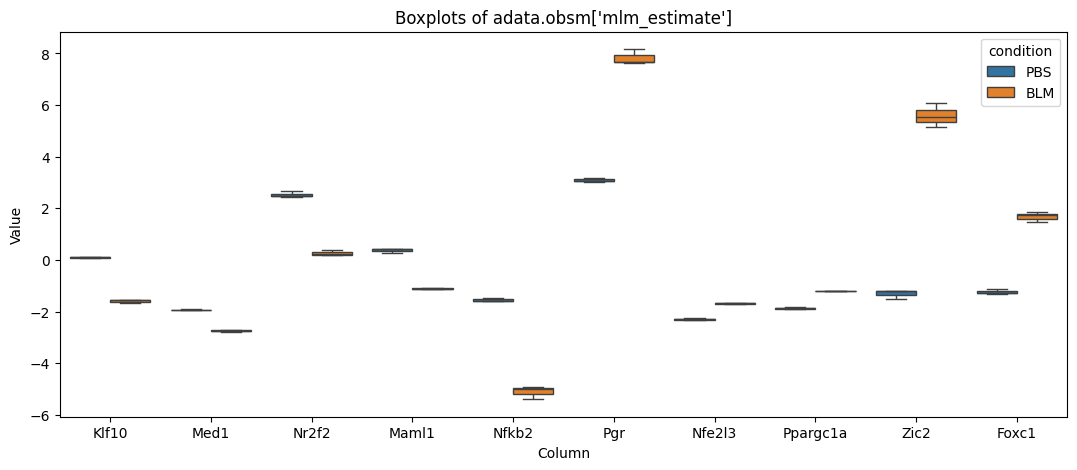

In [159]:
import seaborn as sns

# Convert adata.obsm['mlm_estimate'] to a DataFrame
mlm_estimate_df = pd.DataFrame(adata.obsm['mlm_estimate'], columns=adata.obsm['mlm_estimate'].columns)
mlm_estimate_df = mlm_estimate_df.loc[:, top_ten_indices.append(dw_ten_indices)]
# Add 'condition' column from adata.obs to mlm_estimate_df
mlm_estimate_df['condition'] = adata.obs['condition']
mlm_estimate_df['condition'] = mlm_estimate_df['condition'].cat.reorder_categories(['PBS', 'BLM'])
# Melt the DataFrame to long format
mlm_estimate_melted = pd.melt(mlm_estimate_df, id_vars='condition', var_name='column', value_name='value')

# Plot boxplots
plt.figure(figsize=(13, 5))
sns.boxplot(data=mlm_estimate_melted, x='column', y='value', hue='condition')
plt.xticks(rotation=0)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Boxplots of adata.obsm[\'mlm_estimate\']')
plt.show()


### 3.1.3 cell-cell communication

In [161]:
import liana as ln

liana_lr = ln.resource.select_resource('mouseconsensus')
liana_lr = ln.resource.explode_complexes(liana_lr)

# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]

# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']

# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1

# Find duplicated rows
duplicates = liana_lr.duplicated()

# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

liana_lr

,interaction,genes,weight
0,Dll1&Notch1,Dll1,1
1,Dll1&Notch2,Dll1,1
2,Dll1&Notch4,Dll1,1
3,Dll1&Notch3,Dll1,1
4,Nrg2&Erbb2_Erbb3,Nrg2,1
...,...,...,...
5070,Serpina1a&Lrp1,Lrp1,1
5071,Serpina1b&Lrp1,Lrp1,1
5072,Serpina1c&Lrp1,Lrp1,1
5073,Serpina1d&Lrp1,Lrp1,1


In [163]:
liana_lr = pd.merge(liana_lr, mm10_gene_split, left_on='genes', right_on='gene_name', how='inner')
liana_lr

,interaction,genes,weight,gene_id,gene_type,gene_name
0,Dll1&Notch1,Dll1,1,ENSMUSG00000014773.13,"gene_type ""protein_coding""",Dll1
1,Dll1&Notch2,Dll1,1,ENSMUSG00000014773.13,"gene_type ""protein_coding""",Dll1
2,Dll1&Notch4,Dll1,1,ENSMUSG00000014773.13,"gene_type ""protein_coding""",Dll1
3,Dll1&Notch3,Dll1,1,ENSMUSG00000014773.13,"gene_type ""protein_coding""",Dll1
4,Nrg2&Erbb2_Erbb3,Nrg2,1,ENSMUSG00000060275.13,"gene_type ""protein_coding""",Nrg2
...,...,...,...,...,...,...
9000,Serpina1a&Lrp1,Lrp1,1,ENSMUSG00000040249.15,"gene_type ""protein_coding""",Lrp1
9001,Serpina1b&Lrp1,Lrp1,1,ENSMUSG00000040249.15,"gene_type ""protein_coding""",Lrp1
9002,Serpina1c&Lrp1,Lrp1,1,ENSMUSG00000040249.15,"gene_type ""protein_coding""",Lrp1
9003,Serpina1d&Lrp1,Lrp1,1,ENSMUSG00000040249.15,"gene_type ""protein_coding""",Lrp1


In [165]:
liana_lr.columns = ['interaction', 'genes1', 'weight', 'genes', 'type', 'genes2']
liana_lr

,interaction,genes1,weight,genes,type,genes2
0,Dll1&Notch1,Dll1,1,ENSMUSG00000014773.13,"gene_type ""protein_coding""",Dll1
1,Dll1&Notch2,Dll1,1,ENSMUSG00000014773.13,"gene_type ""protein_coding""",Dll1
2,Dll1&Notch4,Dll1,1,ENSMUSG00000014773.13,"gene_type ""protein_coding""",Dll1
3,Dll1&Notch3,Dll1,1,ENSMUSG00000014773.13,"gene_type ""protein_coding""",Dll1
4,Nrg2&Erbb2_Erbb3,Nrg2,1,ENSMUSG00000060275.13,"gene_type ""protein_coding""",Nrg2
...,...,...,...,...,...,...
9000,Serpina1a&Lrp1,Lrp1,1,ENSMUSG00000040249.15,"gene_type ""protein_coding""",Lrp1
9001,Serpina1b&Lrp1,Lrp1,1,ENSMUSG00000040249.15,"gene_type ""protein_coding""",Lrp1
9002,Serpina1c&Lrp1,Lrp1,1,ENSMUSG00000040249.15,"gene_type ""protein_coding""",Lrp1
9003,Serpina1d&Lrp1,Lrp1,1,ENSMUSG00000040249.15,"gene_type ""protein_coding""",Lrp1


In [166]:
# Infer lr activities with ulm
dc.run_ulm(
    mat=adata,
    net=liana_lr,
    source='interaction',
    target='genes',
    min_n=2,
    use_raw=False,
    verbose=True
)

Running ulm on mat with 6 samples and 21344 targets for 3140 sources.


In [167]:
adata

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors', 'mlm_estimate', 'mlm_pvals', 'ulm_estimate', 'ulm_pvals'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [175]:

mlm_estimate_df 

,A2m&Lrp1,Ace&Agtr2,Ace&Bdkrb2,Actr2&Adrb2,Actr2&Ldlr,Actr2&Lrp2,Ada&Dpp4,Adam10&Axl,Adam10&Cadm1,Adam10&Cd44,...,Wnt9b&Fzd6_Lrp5,Wnt9b&Fzd6_Lrp6,Wnt9b&Fzd7_Lrp5,Wnt9b&Fzd7_Lrp6,Wnt9b&Fzd8_Lrp5,Wnt9b&Fzd8_Lrp6,Wnt9b&Fzd9_Lrp5,Wnt9b&Fzd9_Lrp6,Xcl1&Xcr1,Ybx1&Notch1
BLM1,5.302138,5.089321,5.108155,1.617142,1.485944,1.091422,-0.055065,2.543343,0.581702,2.434380,...,0.066509,0.092836,0.129712,0.156039,0.043440,0.069768,-0.017447,0.008880,-0.271521,2.500762
BLM2,4.984843,3.444343,3.455739,1.413504,1.363933,0.960871,-0.090916,2.590964,0.500890,2.494948,...,0.008888,0.046859,0.104440,0.142411,-0.023146,0.014825,-0.057913,-0.019942,-0.234059,1.900141
BLM3,4.748923,5.706896,5.724713,1.642325,1.583702,1.075453,-0.064739,2.412760,0.601632,2.405154,...,0.088055,0.119505,0.164103,0.195553,0.064073,0.095523,-0.001667,0.029783,-0.287335,2.681825
PBS1,5.578269,10.527495,10.561129,2.229731,1.781188,1.397258,0.076928,2.282459,0.886781,2.439164,...,0.374677,0.290845,0.410265,0.326433,0.385101,0.301268,0.246026,0.162195,-0.414523,4.199720
PBS2,6.003999,9.606345,9.630333,2.345494,1.867192,1.455907,0.022831,2.711277,0.748659,2.892729,...,0.309741,0.118504,0.379805,0.188568,0.343927,0.152690,0.212938,0.021701,-0.405370,4.239240
PBS3,5.017456,10.357409,10.388310,2.180265,1.624185,1.269086,0.021992,1.981593,0.766812,2.271336,...,0.436228,0.186598,0.478760,0.229130,0.461403,0.211773,0.327312,0.077684,-0.401694,3.964473


In [176]:
from scipy import stats
ulm_estimate_df = pd.DataFrame(adata.obsm['ulm_estimate'], columns=adata.obsm['ulm_estimate'].columns)

# Add 'condition' column from adata.obs to mlm_estimate_df
ulm_estimate_df['condition'] = adata.obs['condition']
ulm_estimate_df['condition'] = ulm_estimate_df['condition'].cat.reorder_categories(['PBS', 'BLM'])
# Perform t-test for each column in mlm_estimate_df
grouped_ulm_estimate = ulm_estimate_df.groupby('condition')

t_test_results = pd.DataFrame(index=ulm_estimate_df.columns[:-1], columns=['t_statistic', 'p_value'])
for column in ulm_estimate_df.columns[:-1]:
    group1 = grouped_ulm_estimate.get_group('PBS')[column]
    group2 = grouped_ulm_estimate.get_group('BLM')[column]
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    t_test_results.loc[column, 't_statistic'] = t_statistic
    t_test_results.loc[column, 'p_value'] = p_value
    print(f"Column: {column}")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    print()


Column: A2m&Lrp1
t-statistic: 1.591346658458361
p-value: 0.1867433552064356

Column: Ace&Agtr2
t-statistic: 7.3989015132965505
p-value: 0.0017797615810624192

Column: Ace&Bdkrb2
t-statistic: 7.386159083976404
p-value: 0.0017913708265621415

Column: Actr2&Adrb2
t-statistic: 7.939226866244973
p-value: 0.0013628421189227453

Column: Actr2&Ldlr
t-statistic: 2.9312910918227604
p-value: 0.04275870484326627

Column: Actr2&Lrp2
t-statistic: 4.818448726994491
p-value: 0.008532648256486012

Column: Ada&Dpp4
t-statistic: 5.253762708429792
p-value: 0.006281090362672466

Column: Adam10&Axl
t-statistic: -0.8729488825700097
p-value: 0.4319624988083392

Column: Adam10&Cadm1
t-statistic: 4.501945514950621
p-value: 0.010806441240199633

Column: Adam10&Cd44
t-statistic: 0.47785116476348416
p-value: 0.6576975855088442

Column: Adam10&Epha3
t-statistic: -3.1733563077164844
p-value: 0.03374912244826409

Column: Adam10&Gpnmb
t-statistic: -18.674456288204635
p-value: 4.840635720371982e-05

Column: Adam10&Il6r

In [177]:
t_test_results.to_csv('/home/lzz/rna/output/t_test_results_cellchat.csv')

In [178]:
t_test_results['t_statistic'] = t_test_results['t_statistic'].astype(float)

In [179]:
top_ten_indices = t_test_results['t_statistic'].nlargest(5).index
top_ten_indices

Index(['Apod&Lepr', 'Ntn4&Unc5a', 'Inhba&Tgfbr3', 'Hras&Insr', 'Inha&Tgfbr3'], dtype='object')

In [180]:
dw_ten_indices = t_test_results['t_statistic'].nsmallest(5).index
dw_ten_indices

Index(['C1qb&C1qbp', 'C4a&C3ar1', 'Fn1&Flt4', 'S100a4&Ccr5', 'Fn1&Robo4'], dtype='object')

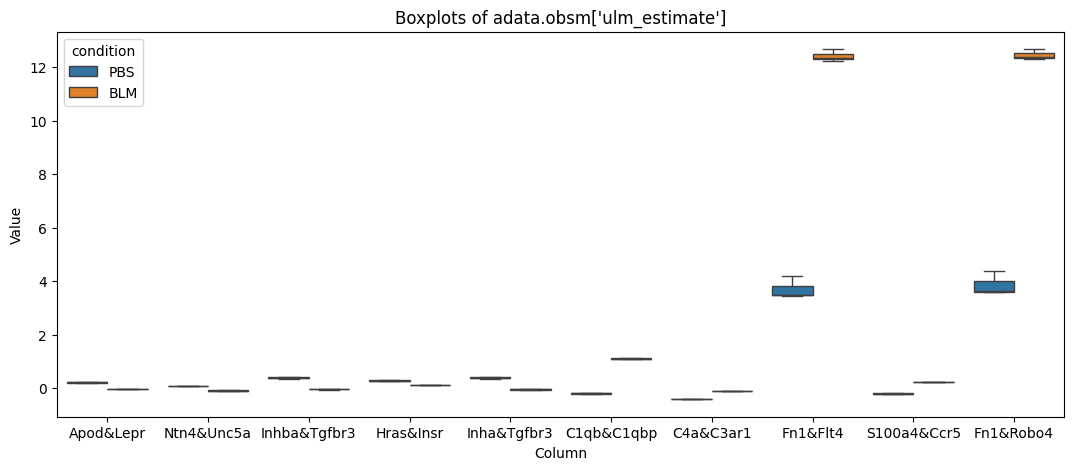

In [183]:
import seaborn as sns

# Convert adata.obsm['mlm_estimate'] to a DataFrame
ulm_estimate_df = pd.DataFrame(adata.obsm['ulm_estimate'], columns=adata.obsm['ulm_estimate'].columns)
ulm_estimate_df = ulm_estimate_df.loc[:, top_ten_indices.append(dw_ten_indices)]
# Add 'condition' column from adata.obs to mlm_estimate_df
ulm_estimate_df['condition'] = adata.obs['condition']
ulm_estimate_df['condition'] = ulm_estimate_df['condition'].cat.reorder_categories(['PBS', 'BLM'])
# Melt the DataFrame to long format
ulm_estimate_melted = pd.melt(ulm_estimate_df, id_vars='condition', var_name='column', value_name='value')

# Plot boxplots
plt.figure(figsize=(13, 5))
sns.boxplot(data=ulm_estimate_melted, x='column', y='value', hue='condition')
plt.xticks(rotation=0)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Boxplots of adata.obsm[\'ulm_estimate\']')
plt.show()


## 3.2 base on DEG

In [7]:
results_df = pd.read_csv('/home/lzz/rna/output/diff_blm_pbs.csv', index_col=0, header=0)
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001.4,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
ENSMUSG00000000028.15,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
ENSMUSG00000000031.16,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
ENSMUSG00000000037.17,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
ENSMUSG00000000049.11,4.257233,0.470250,1.132811,0.415118,0.678055,NaN
...,...,...,...,...,...,...
ENSMUSG00000118425.1,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN
ENSMUSG00000118449.1,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379
ENSMUSG00000118456.1,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902
ENSMUSG00000118458.1,1.735343,0.319902,1.734829,0.184400,0.853700,NaN


In [8]:
mm10_gene_split.index = mm10_gene_split['gene_id']

In [9]:
results_df = results_df.join(mm10_gene_split['gene_name'], how='inner')
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
ENSMUSG00000000001.4,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734,Gnai3
ENSMUSG00000000028.15,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292,Cdc45
ENSMUSG00000000031.16,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923,H19
ENSMUSG00000000037.17,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677,Scml2
ENSMUSG00000000049.11,4.257233,0.470250,1.132811,0.415118,0.678055,NaN,Apoh
...,...,...,...,...,...,...,...
ENSMUSG00000118425.1,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN,AL844494.1
ENSMUSG00000118449.1,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379,AC241534.1
ENSMUSG00000118456.1,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902,AC137513.1
ENSMUSG00000118458.1,1.735343,0.319902,1.734829,0.184400,0.853700,NaN,AL844494.3


In [10]:
results_df = results_df.rename({'gene_name': 'target'}, axis=1)
results_df = results_df.drop_duplicates(subset='target')
results_df = results_df.set_index('target')
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
target,,,,,,
Gnai3,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
Cdc45,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
H19,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
Scml2,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
Apoh,4.257233,0.470250,1.132811,0.415118,0.678055,NaN
...,...,...,...,...,...,...
AL844494.1,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN
AC241534.1,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379
AC137513.1,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902


In [11]:
mat = results_df[['stat']].T.rename(index={'stat': 'blm.vs.pbs'})
mat

target,Gnai3,Cdc45,H19,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,Cox5a,...,AC152060.1,AC166172.7,AL607088.1,Gpr52,AC154328.1,AL844494.1,AC241534.1,AC137513.1,AL844494.3,AC151602.1
blm.vs.pbs,0.9844,0.822264,3.126598,1.130179,0.415118,0.262736,-3.341363,1.159322,-1.402374,3.982733,...,1.135118,0.083888,-1.318289,0.576649,-0.950164,-1.466778,0.249671,-2.623016,0.1844,-1.540121


### 3.2.1 CollectTF

In [6]:
# Retrieve CollecTRI gene regulatory network
collectri = dc.get_collectri(organism='mouse', split_complexes=False)
collectri

,source,target,weight,PMID
0,Myc,Tert,1,10022128;10491298;10606235;10637317;10723141;1...
1,Spi1,Bglap,1,10022617
2,Spi1,Bglap3,1,10022617
3,Spi1,Bglap2,1,10022617
4,Smad3,Jun,1,10022869;12374795
...,...,...,...,...
38660,Runx1,Lcp2,1,20019798
38661,Runx1,Prr5l,1,20019798
38662,Twist1,Gli1,1,11948912
38663,Usf1,Nup188,1,22951020


In [12]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

Running ulm on mat with 1 samples and 21320 targets for 653 sources.


,Abl1,Aebp1,Ahr,Ahrr,Aip,Aire,Apex1,Ar,Arid1a,Arid3a,...,Znf143,Znf148,Znf24,Znf263,Znf335,Znf354c,Znf382,Znf436,Znf76,Zxdc
blm.vs.pbs,-1.188458,5.659942,1.776694,-0.12808,-1.540919,1.769012,-1.384269,-0.324252,-0.59012,0.750808,...,1.795821,0.569861,2.84536,1.872576,0.48123,-3.825531,-1.042624,-0.214883,0.974957,-0.506707


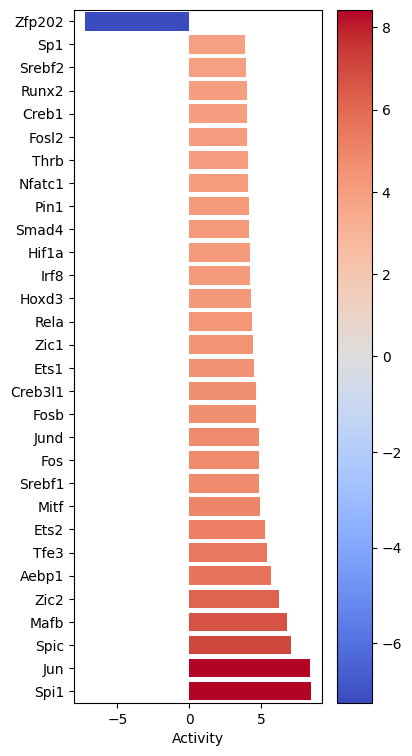

In [69]:
dc.plot_barplot(
    acts=tf_acts,
    contrast='blm.vs.pbs',
    top=30,
    vertical=True,
    figsize=(4, 9)
)
plt.savefig('/home/lzz/rna/output/ulm_tf.pdf', bbox_inches='tight')

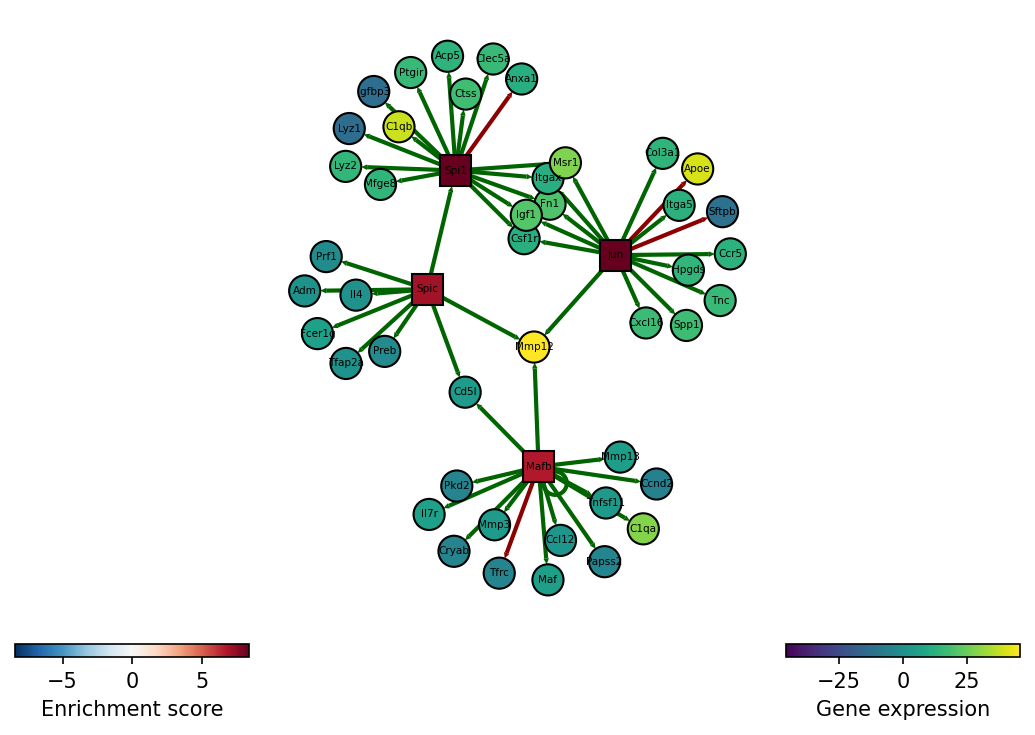

In [63]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=['Spi1', 'Jun', 'Spic', 'Mafb'],
    n_targets=15,
    node_size=0.5,
    figsize=(7, 5),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True
)
plt.savefig('/home/lzz/rna/output/network_tf.pdf', bbox_inches='tight')

/home/lzz/mambaforge/envs/scanpy/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


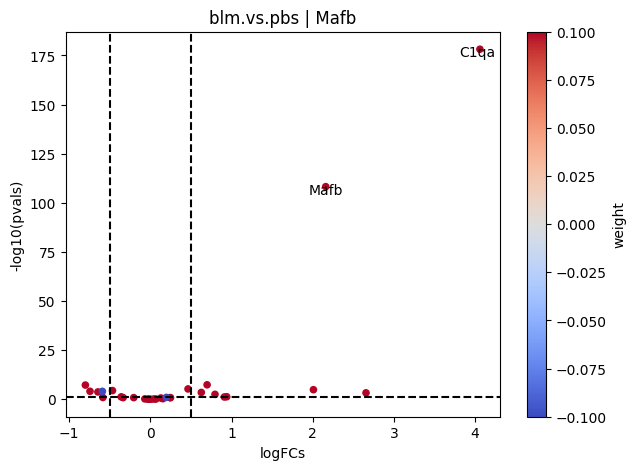

In [15]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'blm.vs.pbs'})
pvals = results_df[['padj']].T.rename(index={'padj': 'blm.vs.pbs'})

# Plot
dc.plot_volcano(
    logFCs,
    pvals,
    'blm.vs.pbs',
    name='Mafb',
    net=collectri,
    top=2,
    sign_thr=0.05,
    lFCs_thr=0.5
)

### 3.2.2 Pathway PROGENy

In [16]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500, organism='mouse')
progeny

,source,target,weight,p_value
0,Androgen,Tmprss2,11.490631,0.000000e+00
1,Androgen,Nkx3-1,10.622551,2.242078e-44
2,Androgen,Mboat2,10.472733,4.624285e-44
3,Androgen,Klk1b21,10.176186,1.944414e-40
4,Androgen,Klk1b9,10.176186,1.944414e-40
...,...,...,...,...
5426,p53,Zmym4,-2.325752,1.522388e-06
5427,p53,Cfdp1,-1.628168,1.526045e-06
5428,p53,Vps37d,2.309503,1.537098e-06
5429,p53,Tedc1,-2.274823,1.547037e-06


In [17]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 21320 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
blm.vs.pbs,0.132001,-0.282856,0.369386,0.347593,0.836086,-2.067886,0.115191,0.061819,1.886393,3.130462,1.426562,0.457987,1.116405,1.225331


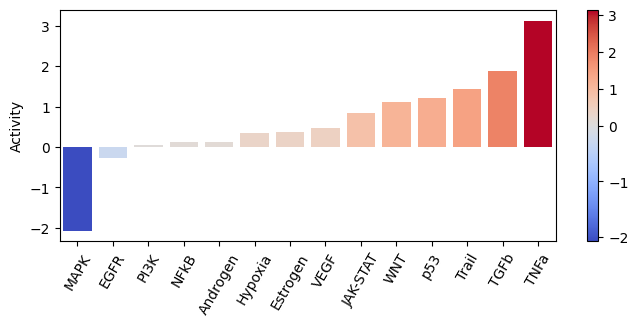

In [18]:

dc.plot_barplot(
    pathway_acts,
    'blm.vs.pbs',
    top=25,
    vertical=False,
    figsize=(8, 3)
)
plt.xticks(rotation=60)
plt.savefig('pathway_enrich_bulk.pdf', bbox_inches='tight')

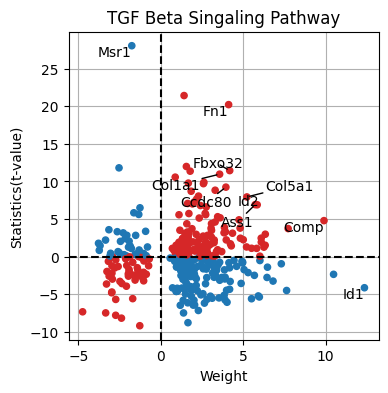

In [38]:
dc.plot_targets(results_df, stat='stat', source_name='TGFb', net=progeny, top=10, figsize=(4,4))
plt.title('TGF Beta Singaling Pathway')
plt.ylabel('Statistics(t-value)')
plt.xlabel('Weight')
plt.savefig('scatter_plot_TGFb.pdf', bbox_inches='tight')

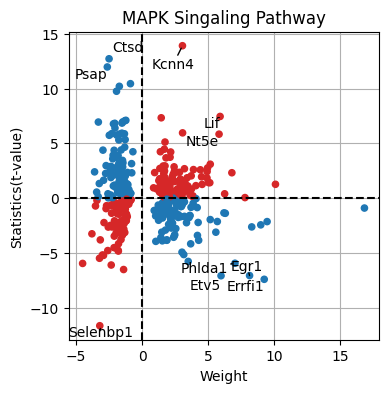

In [40]:
dc.plot_targets(results_df, stat='stat', source_name='MAPK', net=progeny, top=10, figsize=(4,4))
plt.title('MAPK Singaling Pathway')
plt.ylabel('Statistics(t-value)')
plt.xlabel('Weight')
plt.savefig('scatter_plot_MAPK.pdf', bbox_inches='tight')

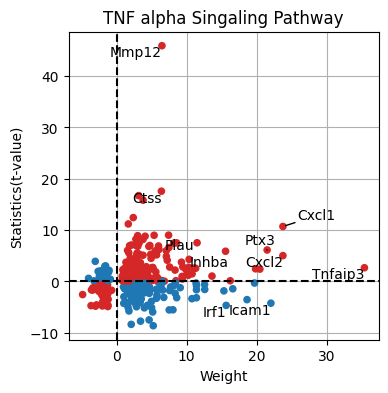

In [42]:
dc.plot_targets(results_df, stat='stat', source_name='TNFa', net=progeny, top=10, figsize=(4,4))
plt.title('TNF alpha Singaling Pathway')
plt.ylabel('Statistics(t-value)')
plt.xlabel('Weight')
plt.savefig('scatter_plot_TNFa.pdf', bbox_inches='tight')

### 3.2.3 Pathway Msigdb

In [43]:
msigdb = dc.get_resource('MSigDB', organism='mouse')
msigdb

,genesymbol,collection,geneset
0,Maff,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,Maff,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,Maff,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,Maff,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,Maff,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3078056,Eif1ax,mirna_targets_mirdb,MIR885_5P
3078057,Eif1a,mirna_targets_mirdb,MIR1206
3078058,Eif1ax,mirna_targets_mirdb,MIR1206
3078059,Eif1a,immunesigdb,GSE17721_LPS_VS_GARDIQUIMOD_4H_BMDC_UP


In [44]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
233,Maff,hallmark,IL2_STAT5_SIGNALING
250,Maff,hallmark,COAGULATION
270,Maff,hallmark,HYPOXIA
373,Maff,hallmark,TNFA_SIGNALING_VIA_NFKB
377,Maff,hallmark,COMPLEMENT
...,...,...,...
1226013,Stxbp1,hallmark,PANCREAS_BETA_CELLS
1226660,Elp4,hallmark,PANCREAS_BETA_CELLS
1226871,Gcg,hallmark,PANCREAS_BETA_CELLS
1227076,Pcsk2,hallmark,PANCREAS_BETA_CELLS


In [45]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
0,ADIPOGENESIS,170,0.364706,2.674883e-06,1.028801e-05,1.750149,22.457224,Abca1;Abcb8;Acads;Aldh2;Aldoa;Angpt1;Apoe;Arl4...
1,ALLOGRAFT_REJECTION,173,0.265896,4.807988e-02,7.512482e-02,1.274493,3.867948,Ccl22;Ccl7;Ccnd2;Ccr1;Ccr2;Ccr5;Cd74;Cd86;Cfp;...
2,ANDROGEN_RESPONSE,96,0.322917,6.776173e-03,1.129362e-02,1.552712,7.754776,Abcc4;Abhd2;Actn1;Akap12;Arid5b;B4galt1;Bmpr1b...
3,ANGIOGENESIS,31,0.709677,3.423262e-09,2.139539e-08,3.401438,66.303107,Ccnd2;Col3a1;Col5a2;Fstl1;Itgav;Jag1;Jag2;Lpl;...
4,APICAL_JUNCTION,164,0.384146,2.757483e-07,1.253401e-06,1.844010,27.851514,Actc1;Actn1;Adam15;Adam23;Amigo1;Arpc2;Atp1a3;...


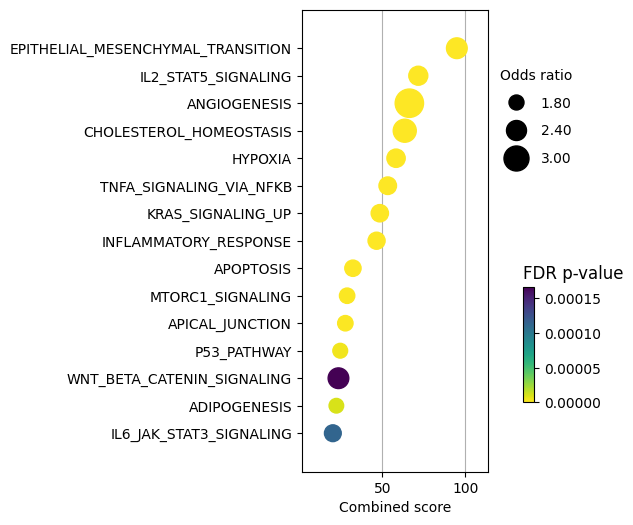

In [47]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=1,
    figsize=(3, 6)
)
plt.savefig('ora_hallmark.pdf', bbox_inches='tight')

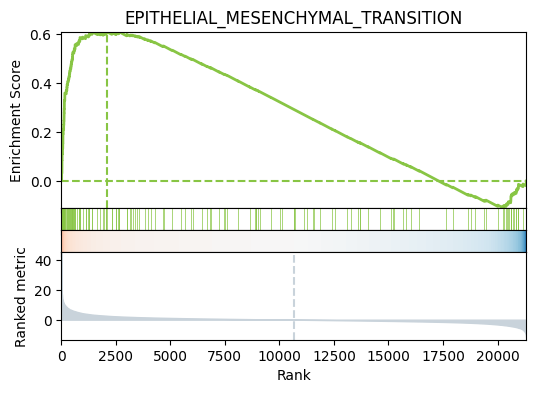

In [53]:
# Plot
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='EPITHELIAL_MESENCHYMAL_TRANSITION',
    figsize=(6, 4)
)
plt.savefig('EPITHELIAL_MESENCHYMAL_TRANSITION.pdf', bbox_inches='tight')

In [35]:
ln.resource.show_resources()

['baccin2019',
 'cellcall',
 'cellchatdb',
 'cellinker',
 'cellphonedb',
 'celltalkdb',
 'connectomedb2020',
 'consensus',
 'embrace',
 'guide2pharma',
 'hpmr',
 'icellnet',
 'italk',
 'kirouac2010',
 'lrdb',
 'mouseconsensus',
 'ramilowski2015']

In [65]:
import liana as ln

liana_lr = ln.resource.select_resource('mouseconsensus')
liana_lr = ln.resource.explode_complexes(liana_lr)

# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]

# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']

# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1

# Find duplicated rows
duplicates = liana_lr.duplicated()

# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

liana_lr

,interaction,genes,weight
0,Dll1&Notch1,Dll1,1
1,Dll1&Notch2,Dll1,1
2,Dll1&Notch4,Dll1,1
3,Dll1&Notch3,Dll1,1
4,Nrg2&Erbb2_Erbb3,Nrg2,1
...,...,...,...
5070,Serpina1a&Lrp1,Lrp1,1
5071,Serpina1b&Lrp1,Lrp1,1
5072,Serpina1c&Lrp1,Lrp1,1
5073,Serpina1d&Lrp1,Lrp1,1


In [66]:
# Infer lr activities with ulm
lr_score, lr_pvalue = dc.run_ulm(
    mat=mat,
    net=liana_lr,
    source='interaction',
    target='genes',
    min_n=2,
    verbose=True
)

Running ulm on mat with 1 samples and 21320 targets for 3140 sources.


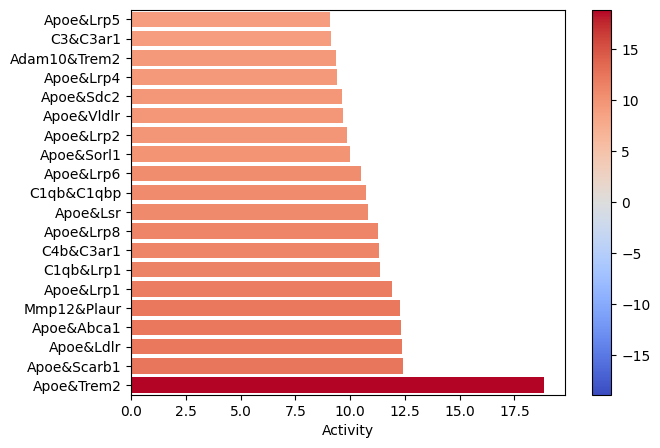

In [67]:
dc.plot_barplot(lr_score, 'blm.vs.pbs', top=20, vertical=True)